<a href="https://colab.research.google.com/github/Sottim/AIDA-Spring2023/blob/main/AIDA_Project2_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import all the necessay modules
#Pandas is for panel data
import pandas as pd
#Numpy for numerical python
import numpy as np
#This is for plotting
import seaborn as sns
#Matlab Plaot library; Python plot
import matplotlib.pyplot as plt

from statsmodels.multivariate.pca import PCA


In [ ]:
df_1 = pd.read_csv("Nifty50_DataSet_10Stocks.csv")
#Display the first five elements
df_1.head()

,Date,HDFC Bank (Adj Close),HDFC Returns,TATA Consultancy (Adj Close),TATA Retuns,Reliance (Adj Close),Reliance Returns,ICICI Bank (Adj Close),ICICI Returns,Kotak Bank (Adj Close),...,Uniliver Returns,Britannica (Adj Close),Britannica Returns,Cipla (Adj Close),Cipla Returns,Infosys (Adj Close),Infosys Returns,Nifty50 (Adj Close,Nifty50 Returns,Unnamed: 23
0,13-04-2022,1448.112671,-28.220000,3546.663330,-28.240000,2543.990723,-9.370000,757.703064,-1.590000,1778.529297,...,19.420000,3187.405273,5.290000,1011.685059,-10.590000,1711.521729,5.970000,17475.65039,-54.650000,NaN
1,18-04-2022,1379.411499,-68.701172,3416.979004,-129.684326,2536.214355,-7.776368,753.279602,-4.423462,1749.346924,...,24.885742,3181.933838,-5.471435,1022.880676,11.195617,1587.064331,-124.457398,17173.65039,-302.000000,NaN
2,19-04-2022,1326.773560,-52.637939,3362.596191,-54.382813,2632.873291,96.658936,761.728882,8.449280,1706.472656,...,-63.044434,3109.614990,-72.318848,995.463867,-27.416809,1528.922119,-58.142212,16958.65039,-215.000000,NaN
3,20-04-2022,1338.734497,11.960937,3444.823486,82.227295,2710.290039,77.416748,751.043030,-10.685852,1720.264404,...,50.650635,3144.156738,34.541748,1007.157104,11.693237,1554.077881,25.155762,17136.55078,177.900390,NaN
4,21-04-2022,1358.554077,19.819580,3514.411621,69.588135,2773.749023,63.458984,757.802429,6.759399,1759.790527,...,32.205567,3197.158936,53.002198,993.722351,-13.434753,1584.519409,30.441528,17392.59961,256.048828,NaN


In [ ]:
# Dropping the Date column as we donot require for our analysis
x_1 = df_1.drop('Date', axis=1)
x_1.head()


,HDFC Bank (Adj Close),HDFC Returns,TATA Consultancy (Adj Close),TATA Retuns,Reliance (Adj Close),Reliance Returns,ICICI Bank (Adj Close),ICICI Returns,Kotak Bank (Adj Close),Kotak Returns,...,Uniliver Returns,Britannica (Adj Close),Britannica Returns,Cipla (Adj Close),Cipla Returns,Infosys (Adj Close),Infosys Returns,Nifty50 (Adj Close,Nifty50 Returns,Unnamed: 23
0,1448.112671,-28.220000,3546.663330,-28.240000,2543.990723,-9.370000,757.703064,-1.590000,1778.529297,-22.240000,...,19.420000,3187.405273,5.290000,1011.685059,-10.590000,1711.521729,5.970000,17475.65039,-54.650000,NaN
1,1379.411499,-68.701172,3416.979004,-129.684326,2536.214355,-7.776368,753.279602,-4.423462,1749.346924,-29.182373,...,24.885742,3181.933838,-5.471435,1022.880676,11.195617,1587.064331,-124.457398,17173.65039,-302.000000,NaN
2,1326.773560,-52.637939,3362.596191,-54.382813,2632.873291,96.658936,761.728882,8.449280,1706.472656,-42.874268,...,-63.044434,3109.614990,-72.318848,995.463867,-27.416809,1528.922119,-58.142212,16958.65039,-215.000000,NaN
3,1338.734497,11.960937,3444.823486,82.227295,2710.290039,77.416748,751.043030,-10.685852,1720.264404,13.791748,...,50.650635,3144.156738,34.541748,1007.157104,11.693237,1554.077881,25.155762,17136.55078,177.900390,NaN
4,1358.554077,19.819580,3514.411621,69.588135,2773.749023,63.458984,757.802429,6.759399,1759.790527,39.526123,...,32.205567,3197.158936,53.002198,993.722351,-13.434753,1584.519409,30.441528,17392.59961,256.048828,NaN


In [ ]:
# Assigning y to Returns from Nifty50.
y = x_1['Nifty50 Returns']
# Dropping all the Closing values of the stocks and the Nifty50 Returns(which is already assigned to y) as we are only concerned with the returns from stocks
x_1.drop(['HDFC Bank (Adj Close)', 'TATA Consultancy (Adj Close)', 'Reliance (Adj Close)', 'ICICI Bank (Adj Close)', 'Kotak Bank (Adj Close)', 'Asian Paints (Adj Close)', 'Hindustan Uniliver (Adj Close)','Britannica (Adj Close)', 'Cipla (Adj Close)', 'Infosys (Adj Close)', 'Nifty50 (Adj Close', 'Nifty50 Returns', 'Unnamed: 23'], axis = 1, inplace = True)
x = x_1
x.head()


,HDFC Returns,TATA Retuns,Reliance Returns,ICICI Returns,Kotak Returns,Paints Returns,Uniliver Returns,Britannica Returns,Cipla Returns,Infosys Returns
0,-28.220000,-28.240000,-9.370000,-1.590000,-22.240000,-47.660000,19.420000,5.290000,-10.590000,5.970000
1,-68.701172,-129.684326,-7.776368,-4.423462,-29.182373,-58.676514,24.885742,-5.471435,11.195617,-124.457398
2,-52.637939,-54.382813,96.658936,8.449280,-42.874268,-30.132568,-63.044434,-72.318848,-27.416809,-58.142212
3,11.960937,82.227295,77.416748,-10.685852,13.791748,91.142334,50.650635,34.541748,11.693237,25.155762
4,19.819580,69.588135,63.458984,6.759399,39.526123,74.711181,32.205567,53.002198,-13.434753,30.441528


In [ ]:
from sklearn.preprocessing import StandardScaler
#  we standardize the features in the DataFrame 'x'  using 'StandardScaler()'
# This step is necessary to scale the features in order to prevent some features from dominating others during the PCA calculation.
x_std = StandardScaler().fit_transform(x)

#Obtain the variance and covariance matrix of the standardized features
cov_matrix = np.cov(x_std.T)
print('Covariance matrix \n%s' %cov_matrix)

Covariance matrix 
[[1.00406504 0.4392635  0.32866048 0.52899076 0.46789006 0.22177012
  0.20289033 0.15018901 0.1984238  0.46200875]
 [0.4392635  1.00406504 0.3068525  0.31121271 0.30211227 0.36030043
  0.25060587 0.17762013 0.26165871 0.81022774]
 [0.32866048 0.3068525  1.00406504 0.42539052 0.28316885 0.10297705
  0.1177488  0.12749574 0.18194695 0.28586897]
 [0.52899076 0.31121271 0.42539052 1.00406504 0.509075   0.22744177
  0.22130377 0.17210771 0.13994295 0.38685328]
 [0.46789006 0.30211227 0.28316885 0.509075   1.00406504 0.22275928
  0.29304076 0.10333556 0.18098035 0.33545394]
 [0.22177012 0.36030043 0.10297705 0.22744177 0.22275928 1.00406504
  0.36528583 0.16134922 0.15591048 0.30867433]
 [0.20289033 0.25060587 0.1177488  0.22130377 0.29304076 0.36528583
  1.00406504 0.48412759 0.23999068 0.28516055]
 [0.15018901 0.17762013 0.12749574 0.17210771 0.10333556 0.16134922
  0.48412759 1.00406504 0.12040858 0.16461816]
 [0.1984238  0.26165871 0.18194695 0.13994295 0.18098035 0.15

In [ ]:
# We now have to get the eigenvalues and eigenvectors which  will be used to obtain principal components.
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.36977613  0.2582054   0.01689156  0.11771521 -0.58903469 -0.10769233
  -0.57384475  0.29421836  0.08522356  0.02772339]
 [-0.3924165   0.04232448 -0.69495495 -0.50414201  0.02500493  0.11207692
   0.13078324  0.06426758  0.06176165 -0.26241345]
 [-0.27433212  0.2855541   0.06638816  0.23979799 -0.26224569  0.02714612
   0.21423615 -0.66091025 -0.34644371 -0.33023904]
 [-0.35662553  0.26848231 -0.13489546  0.37630014  0.68522399 -0.32759287
  -0.22350195 -0.04421554  0.10345726  0.03842335]
 [-0.33391445  0.18777696  0.02443495  0.32672393 -0.04853118  0.48703313
   0.50683981  0.27664899  0.13598505  0.39297026]
 [-0.26348492 -0.29164297  0.09102608 -0.20347452 -0.00350968  0.20164156
  -0.25045318 -0.58287835  0.42479339  0.41501497]
 [-0.27939507 -0.56594085 -0.08749985  0.19983237 -0.23114831 -0.60420248
   0.35141308  0.0544815   0.03139858  0.09013717]
 [-0.19830082 -0.55926623  0.05741116  0.32719311  0.13351903  0.45807778
  -0.24588961  0.13075644 -0.08007541

In [ ]:
#Now calculate the cumlative variance which helps us to determine how many principal components we need to retain for our analysis.
total_sum = sum(eig_vals)
var_exp = [(i / total_sum)*100 for i in sorted(eig_vals, reverse=True)]
cumulative_var = np.cumsum(var_exp)
print("Cumulative Variance",cumulative_var)


Cumulative Variance [ 36.42378157  49.60190693  60.33687414  69.22076328  77.40250041
  84.39314028  89.75266799  94.08497532  98.20528265 100.        ]


In [ ]:
#In the previous section, we see the first 6 components contribute to more than 80% i.e approximately 84%  of the information.
# Later on we can reduce the remaining 4 components during in dimension reduction.
#Extract the PCA components
pc = PCA(x, ncomp=10, standardize=True, demean = True)
#Returning the PCA object 'pc'.
pc

Principal Component Analysis(nobs: 247, nvar: 10, transformation: Standardize (Correlation), normalization: True, number of components: 10, SVD, id: 0x7f6aaf9f1bb0)

In [ ]:
#Compute the loadings on the variables and is used to represent the correlation between each variable and the principal component.
df_comp = pc.loadings.T
df_comp


,HDFC Returns,TATA Retuns,Reliance Returns,ICICI Returns,Kotak Returns,Paints Returns,Uniliver Returns,Britannica Returns,Cipla Returns,Infosys Returns
comp_0,0.369776,0.392416,0.274332,0.356626,0.333914,0.263485,0.279395,0.198301,0.216113,0.402271
comp_1,-0.258205,-0.042324,-0.285554,-0.268482,-0.187777,0.291643,0.565941,0.559266,0.140966,-0.068261
comp_2,0.117715,-0.504142,0.239798,0.376300,0.326724,-0.203475,0.199832,0.327193,-0.194080,-0.447296
comp_3,-0.085224,-0.061762,0.346444,-0.103457,-0.135985,-0.424793,-0.031399,0.080075,0.804767,-0.064853
comp_4,0.027723,-0.262413,-0.330239,0.038423,0.392970,0.415015,0.090137,-0.475303,0.446470,-0.244540
comp_5,-0.294218,-0.064268,0.660910,0.044216,-0.276649,0.582878,-0.054482,-0.130756,-0.057282,-0.175839
comp_6,0.573845,-0.130783,-0.214236,0.223502,-0.506840,0.250453,-0.351413,0.245890,0.167005,-0.162144
comp_7,-0.589035,0.025005,-0.262246,0.685224,-0.048531,-0.003510,-0.231148,0.133519,0.121115,0.160670
comp_8,-0.107692,0.112077,0.027146,-0.327593,0.487033,0.201642,-0.604202,0.458078,0.054111,-0.110012
comp_9,0.016892,-0.694955,0.066388,-0.134895,0.024435,0.091026,-0.087500,0.057411,0.001084,0.688703


In [ ]:
#Compute the scores which represent the projection of each observation onto each principal component.
scores = pd.DataFrame(pc.factors)
scores.head()

,comp_0,comp_1,comp_2,comp_3,comp_4,comp_5,comp_6,comp_7,comp_8,comp_9
0,-0.047132,0.032914,0.001455,0.002724,-0.068636,-0.002700,-0.080928,0.067482,-0.086095,0.066403
1,-0.170243,0.102158,0.170730,0.145159,0.100894,0.117566,-0.072739,0.097278,-0.051468,-0.247547
2,-0.116612,-0.110970,0.075861,0.006880,-0.091462,0.267799,-0.065109,0.118158,-0.040547,-0.115222
3,0.098940,0.064420,-0.073465,0.023275,-0.008861,0.122330,-0.063030,-0.150915,0.057911,-0.026121
4,0.112671,0.002205,0.014341,-0.095213,-0.048079,0.067536,-0.060560,-0.062251,0.075703,-0.002071


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca = PCA()
x_reduction = pca.fit_transform(scale(x))
x_reduction

array([[ 1.41369985,  0.59382772,  0.02369817, ..., -0.69806167,
        -0.86854047, -0.4421138 ],
       [ 5.10634623,  1.84308896,  2.78008581, ..., -1.00628705,
        -0.51921565,  1.64817765],
       [ 3.49771287, -2.00207565,  1.23528142, ..., -1.22228583,
        -0.40904424,  0.76715241],
       ...,
       [ 0.46854315, -0.75178099, -1.41939762, ..., -0.19723861,
         0.55522726,  0.45294102],
       [-1.162112  , -0.82982285,  2.78978878, ..., -0.28382597,
         1.05326875, -0.06248221],
       [-1.51360662, -0.74717518, -0.80519361, ..., -0.1660106 ,
         0.03148012, -0.23685981]])

In [ ]:
# split the data into training and testing datasets with the ratio of 80:20. It reduces the dimensionality of the training and testing data using PCA,
# where it retains only the first 6 principal components for the testing dataset.

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# Reducing the dimensionality of the data using PCA and retaining only the first 6 principal components for the testing dataset.
x_train = pca.fit_transform(scale(x_train))
x_test = pca.transform(scale(x_test))[:, 0:6]



In [ ]:
from sklearn.linear_model import LinearRegression

# Training a Linear Regression model on the first 6 principal components. it predicts the values of the dependent variable
# 'y_test' using the trained model and stores the results in 'y_pred'.


lm = LinearRegression()
pcr = lm.fit(x_train[:,0:6], y_train)
y_pred = pcr.predict(x_test)


In [ ]:
# printing the predicted daily returns for Nifty50
print("Daily returns of Nifty50 with prediction is : ", y_pred)


Daily returns of Nifty50 with prediction is :  [ 152.93590293 -139.94727176 -160.57731606   35.24224371   85.00175165
 -119.47879526  108.49601813  -96.13310349  200.4905111    37.76777697
  106.54400456 -182.6722379    74.95443494 -230.00426937   34.97194644
  215.45744184  -80.10376503 -123.23786108  -81.26236999  457.82655943
  -33.2309332    -2.0632569  -179.24321701  221.6323623  -155.15668525
  133.16452017  -87.33291047  -58.25851206  273.76740485  -29.53731056
 -121.87597406  144.62124109 -165.95466336   35.66550015  -38.92829196
 -270.61678767 -133.31923505   84.67225775   56.82693219  125.29309143
  -68.17497443  -59.38306722  -23.473826   -149.82807433   22.65779046
   38.81390723   -2.13734255   10.03367622  160.37575912   88.31018971]


In [ ]:
from sklearn.metrics import mean_squared_error
# calculating the root mean squared error (RMSE) between the predicted and actual values.
print("Root mean squared error of the model: ", (np.sqrt(mean_squared_error(y_test, y_pred))))

Root mean squared error of the model:  50.9423776175843


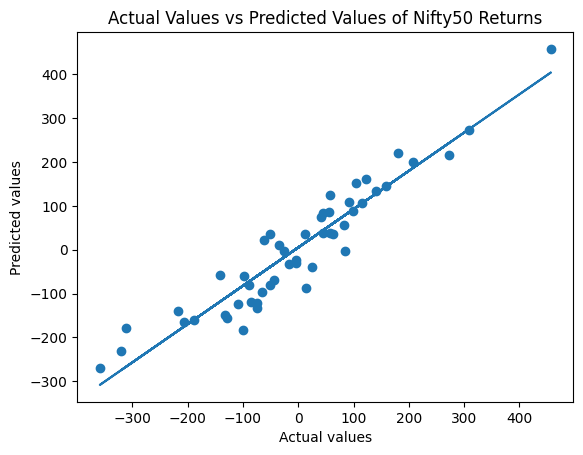

In [ ]:
# Creating the scatter plot for Actual vs Predicted values for Nifty50 returns over the span of 1 year.
# This will help us visualize how well our model is predicting the actual values.
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual Values vs Predicted Values of Nifty50 Returns')
# find the coefficients of the linear regression line that best fits the data.
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
# plotting the regression line on top of the scatter plot.
plt.plot(y_test,p(y_test))